In [1]:
from image_analyzer import Image_analyzer
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_03_43_a_path = images_dir+"Fig0343(a)(skeleton_orig).pgm"
print(fig_03_43_a_path)

fig_03_43_a_analyzer = Image_analyzer(fig_03_43_a_path)

fig_03_43_a_analyzer.mypgmread()

/Users/fuad/Documents/coding/image_processing_tutorials/005_frequency_domain_filtering/images/Fig0343(a)(skeleton_orig).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/005_frequency_domain_filtering/images/Fig0343(a)(skeleton_orig).pgm


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 500,
 800,
 255)

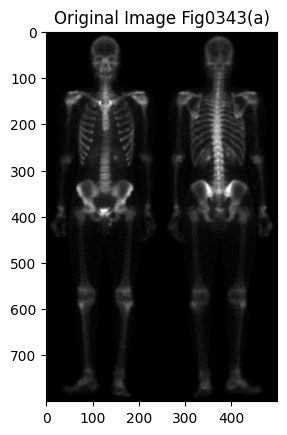

In [3]:
plt.figure()
plt.title("Original Image Fig0343(a)")
plt.imshow(fig_03_43_a_analyzer.image_array, cmap='gray')

In [4]:
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

fig_03_43_b_time_domain = fig_03_43_a_analyzer.myImageCorrelation(laplacian_kernel)



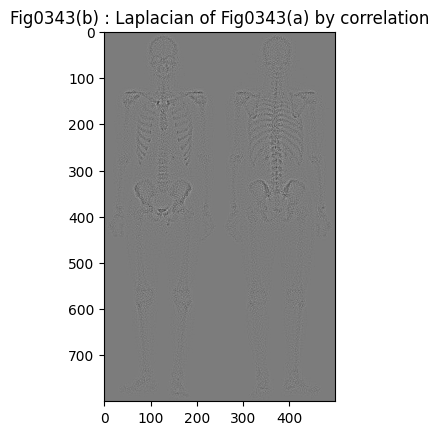

In [5]:
plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by correlation")
plt.imshow(fig_03_43_b_time_domain, cmap='gray')

In [6]:
laplacian_kernel_size = laplacian_kernel.shape
print(laplacian_kernel_size)
fig_03_43_a_size = fig_03_43_a_analyzer.image_array.shape
print(fig_03_43_a_size)



(3, 3)
(800, 500)


In [7]:
print(laplacian_kernel)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


In [8]:
print(laplacian_kernel[0])

[0 1 0]


In [9]:
fig_03_43_a_fourier = fig_03_43_a_analyzer.my2Dfft(m_point=laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                   n_point=laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)

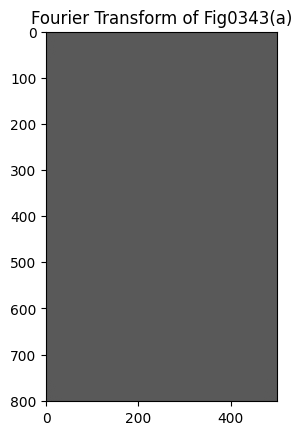

In [10]:
plt.figure()
plt.title("Fourier Transform of Fig0343(a)")
plt.imshow(np.real(fig_03_43_a_fourier), cmap='gray')

In [11]:
laplacian_kernel_fourier = Image_analyzer().my2Dfft(    image_array= laplacian_kernel,
                                                            m_point=laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                            n_point=laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)


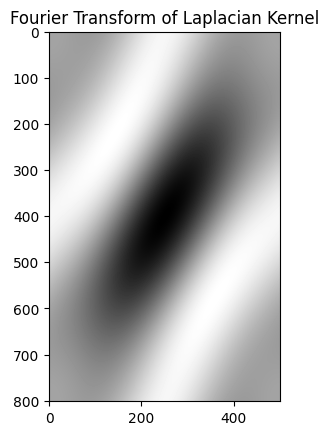

In [12]:
plt.figure()
plt.title("Fourier Transform of Laplacian Kernel")
plt.imshow(np.real(laplacian_kernel_fourier), cmap='gray')


In [13]:
fig_03_43_b_fourier_domain = fig_03_43_a_fourier * laplacian_kernel_fourier

fig_03_43_b_inverse_fourier = Image_analyzer().my2Difft(fig_03_43_b_fourier_domain)

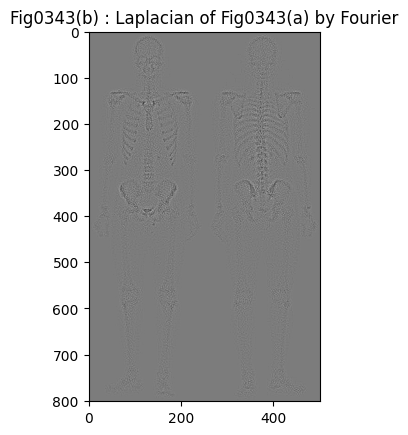

In [14]:
plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by Fourier")
plt.imshow(np.real(fig_03_43_b_inverse_fourier), cmap='gray')


In [15]:
#try to do the same things with numpy
fig_03_43_a_np = fig_03_43_a_analyzer.image_array
fig_03_43_b_np = np.zeros(fig_03_43_a_size)
fig_03_43_a_fourier_np = np.fft.fft2(fig_03_43_a_np, s = (laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                           laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1))
laplacian_kernel__fourier_np = np.fft.fft2(laplacian_kernel, s = (laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                              laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1))
fig_03_43_b_fourier_domain_np = fig_03_43_a_fourier_np * laplacian_kernel__fourier_np
fig_03_43_b_np = np.real(np.fft.ifft2(fig_03_43_b_fourier_domain_np , s = 
                                      (laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                     laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)))


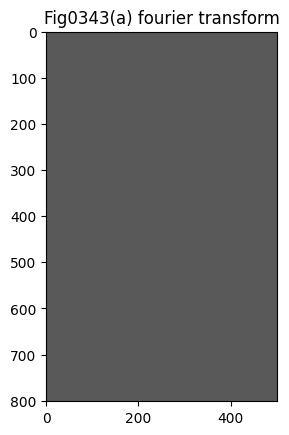

In [16]:
plt.figure()
plt.title("Fig0343(a) fourier transform")
plt.imshow(np.real(fig_03_43_a_fourier_np), cmap='gray')
plt.show()

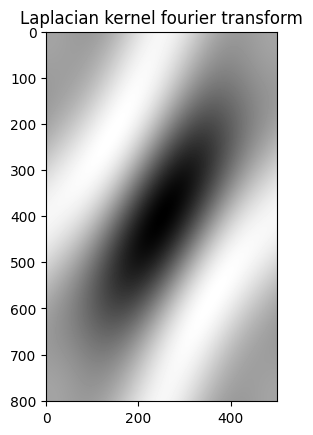

In [17]:
plt.figure()
plt.title("Laplacian kernel fourier transform")
plt.imshow(np.real(laplacian_kernel__fourier_np), cmap='gray')

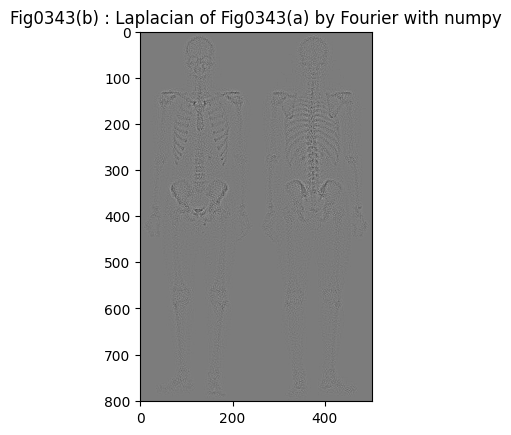

In [18]:

plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by Fourier with numpy")
plt.imshow(fig_03_43_b_np, cmap='gray')

plt.show()